In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

2024-02-05 23:49:43.108147: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
#adopted from:
#https://github.com/csbanon/mnist-classifiers/blob/main/mnist-digits/mnist-digit-classification-with-a-fully-connected-neural-network.ipynb

In [2]:
# Load the MNIST dataset.
mnist = tf.keras.datasets.mnist
train_data, test_data = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [11]:
#train_data[0][0]
#train_data[1][0]

In [12]:
# Divide the data into features and labels.
train_images, train_labels = train_data
test_images, test_labels = test_data

In [13]:
# Reshape and normalize the images.
X_train = train_images.reshape((60000, 784))
X_train = X_train.astype('float32') / 255
X_test = test_images.reshape((10000, 784))
X_test = X_test.astype('float32') / 255

In [14]:
# Reshape the labels and encode them categorically.
y_train = tf.keras.utils.to_categorical(train_labels)
y_test = tf.keras.utils.to_categorical(test_labels)

In [17]:
# Show the shapes of the data.
print("Training Images:", X_train.shape)
print("Testing Images:", X_test.shape)
print("Training Labels:", y_train.shape)
print("Test Labels:", y_test.shape)

Training Images: (60000, 784)
Testing Images: (10000, 784)
Training Labels: (60000, 10)
Test Labels: (10000, 10)


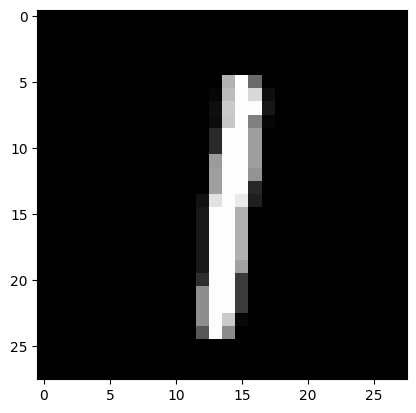

In [24]:
# Show a sample MNIST digit.
plt.imshow(train_images[40], cmap=plt.get_cmap('gray'))
plt.show()

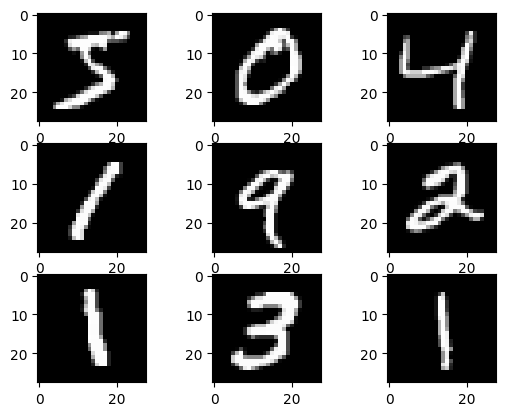

In [25]:
#we can do it better;)
for i in range(9): 
    plt.subplot(330 + 1 + i)
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
plt.show()

In [26]:
# Define the sequential model.
model = tf.keras.models.Sequential()

In [27]:
# Add two fully-connected layers to the network.
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [28]:
# Show the model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# Compile the model.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
# Define the parameters.
num_epochs = 10
batch_size = 256

# Train the model.
history = model.fit(X_train, 
                      y_train, 
                      epochs=num_epochs, 
                      batch_size=batch_size, 
                      validation_data=(X_test, y_test))

Epoch 1/10
235/235 [==============================] - 2s 5ms/step - loss: 0.3325 - accuracy: 0.9067 - val_loss: 0.1690 - val_accuracy: 0.9517
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1401 - accuracy: 0.9600 - val_loss: 0.1095 - val_accuracy: 0.9679
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0934 - accuracy: 0.9738 - val_loss: 0.0907 - val_accuracy: 0.9717
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0691 - accuracy: 0.9804 - val_loss: 0.0754 - val_accuracy: 0.9764
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0524 - accuracy: 0.9847 - val_loss: 0.0724 - val_accuracy: 0.9772
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0408 - accuracy: 0.9884 - val_loss: 0.0663 - val_accuracy: 0.9802
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0316 - accuracy: 0.9916 - val_loss: 0.0698 - val_accuracy: 0.9775
Epoch 

In [31]:

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

313/313 [==============================] - 0s 1ms/step - loss: 0.0632 - accuracy: 0.9796
Test Accuracy: 0.9796000123023987
Test Loss: 0.0631779208779335


In [32]:
# Save the metrics.
metrics = history.history

In [33]:
# Save the loss values.
training_loss_list = metrics['loss']
test_loss_list = metrics['val_loss']

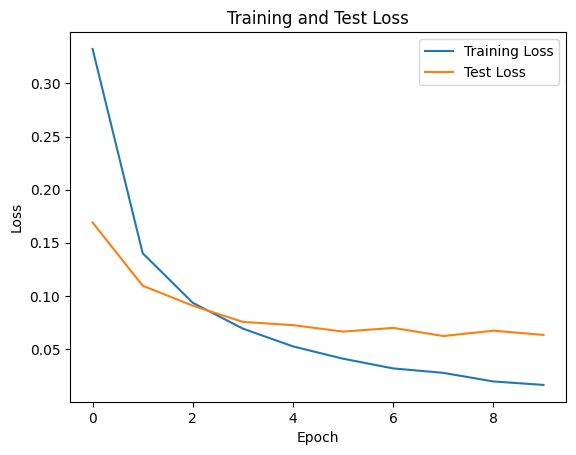

In [34]:
# Plot the training and test loss.
x = np.arange(0, num_epochs, 1)
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x, training_loss_list, label='Training Loss')
plt.plot(x, test_loss_list, label='Test Loss')
plt.legend()
plt.show()

In [35]:
train_accuracy_list = metrics['accuracy']
test_accuracy_list = metrics['val_accuracy']

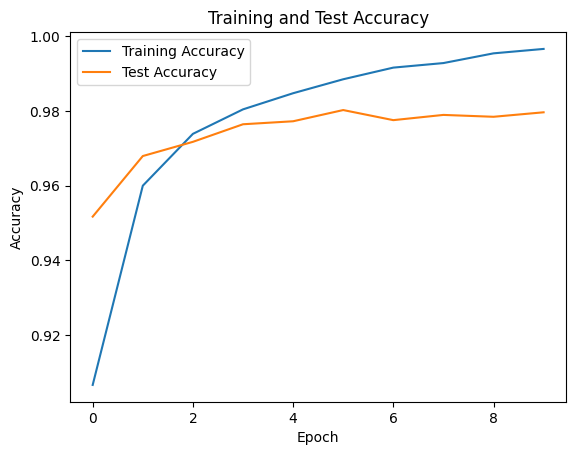

In [36]:
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, train_accuracy_list, label='Training Accuracy')
plt.plot(x, test_accuracy_list, label='Test Accuracy')
plt.legend()
plt.show()

In [37]:
# Make predictions with the trained model.
predictions = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


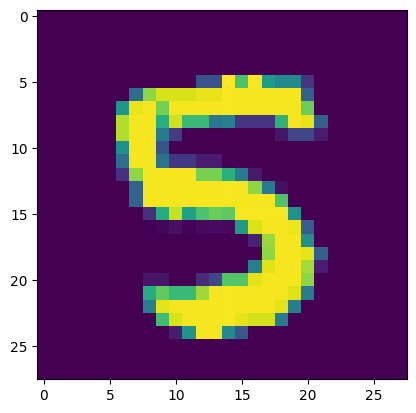

In [38]:
# Choose an index.
index = 120

# Show an image from the test set.
plt.imshow(test_images[index])
plt.show()

In [39]:
print("Prediction:", np.argmax(predictions[index]))

Prediction: 5
